In [208]:
import pandas as pd
import numpy as np

In [209]:
data=pd.read_csv('churn.csv')

In [210]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Intl Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [236]:
data.describe()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [212]:
data.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [213]:
data.drop(columns=['Area Code','Phone','State','Account Length'],inplace=True)

In [214]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Intl Plan']=le.fit_transform(data['Intl Plan'])
data['VMail Plan']=le.fit_transform(data['VMail Plan'])
data['Churn']=le.fit_transform(data['Churn'])

In [215]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [216]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [217]:
import seaborn as sns

In [218]:
X_train

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
1460,0,0,0,198.1,160,33.68,156.7,87,13.32,182.1,76,8.19,9.3,3,2.51,3
2000,0,0,0,168.2,87,28.59,161.7,92,13.74,192.4,112,8.66,10.1,3,2.73,3
666,0,0,0,252.0,120,42.84,150.2,106,12.77,151.8,96,6.83,9.6,1,2.59,2
2962,0,0,0,251.6,88,42.77,175.1,103,14.88,184.4,112,8.30,5.4,5,1.46,1
2773,0,1,34,247.2,105,42.02,225.5,133,19.17,186.3,76,8.38,6.1,5,1.65,2
961,0,0,0,217.6,81,36.99,320.5,51,27.24,150.7,110,6.78,4.2,3,1.13,0
3079,0,0,0,131.5,99,22.36,174.8,128,14.86,184.2,83,8.29,7.9,2,2.13,5
1120,0,0,0,157.1,79,26.71,162.6,124,13.82,150.0,138,6.75,12.1,6,3.27,1
962,0,0,0,212.1,95,36.06,150.1,88,12.76,219.8,111,9.89,7.7,2,2.08,3
2293,1,1,31,225.0,78,38.25,191.3,79,16.26,226.7,79,10.20,9.1,3,2.46,1


In [219]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [220]:
X_train.shape

(2666, 16)

In [221]:
X_test

array([[ 2.83081499, -0.6288064 , -0.60135811, ...,  0.20150675,
        -0.34407585, -1.22320581],
       [-0.35325516,  1.5903146 ,  1.94534575, ..., -0.58448742,
        -0.08378017,  0.30895997],
       [-0.35325516, -0.6288064 , -0.60135811, ..., -0.19149033,
         0.84780438,  1.07504285],
       ...,
       [-0.35325516, -0.6288064 , -0.60135811, ..., -0.58448742,
         0.5875087 , -0.45712292],
       [ 2.83081499, -0.6288064 , -0.60135811, ..., -1.3704816 ,
        -0.86466722, -0.45712292],
       [-0.35325516, -0.6288064 , -0.60135811, ..., -0.19149033,
        -0.30297653,  1.07504285]])

In [222]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,max_iter=10000,penalty='l2',C=10)
lr.fit(X_train,y_train)

C:\Users\800410\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
lr.score(X_test,y_test)*100
y_pred=lr.predict(X_test)

In [224]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [225]:
acc=accuracy_score(y_pred,y_test,normalize=True)

In [226]:
acc*100

87.25637181409296

In [227]:
confusion_matrix(y_pred,y_test)

array([[564,  70],
       [ 15,  18]], dtype=int64)

In [228]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
penalty = ['l1', 'l2']
C = uniform(loc=0, scale=4)
hyperparameters = dict(C=C, penalty=penalty)

In [229]:
clf = RandomizedSearchCV(estimator=lr,param_distributions=hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [230]:
clf.fit(X_train,y_train)

C:\Users\800410\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=10, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=10000,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=0,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x47457A70>,
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   retur

In [231]:
clf.score(X_test,y_test)*100

86.95652173913044

In [232]:
clf.best_estimator_

LogisticRegression(C=0.15621913293152945, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=0, solver='warn', tol=0.0001,
                   verbose=0, warm_start=False)

In [233]:
lr2=LogisticRegression(C=0.15621913293152945, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=0, solver='warn', tol=0.0001,
                   verbose=0, warm_start=False)

In [234]:
lr2.fit(X_train,y_train)

C:\Users\800410\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.15621913293152945, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=0, solver='warn', tol=0.0001,
                   verbose=0, warm_start=False)

In [235]:
lr2.score(X_test,y_test)*100

86.95652173913044

In [206]:
X_test

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
405,1,0,0,264.3,91,44.93,160.9,115,13.68,198.6,73,8.94,9.3,5,2.51,0
118,0,1,36,113.7,117,19.33,157.5,82,13.39,177.6,118,7.99,10.0,3,2.70,2
710,0,0,0,195.3,70,33.20,216.7,108,18.42,259.9,119,11.70,12.5,4,3.38,3
499,0,0,0,175.2,91,29.78,244.4,109,20.77,75.8,95,3.41,7.5,2,2.03,1
2594,1,0,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1
1977,1,0,0,237.8,92,40.43,208.9,119,17.76,167.8,86,7.55,15.6,6,4.21,2
1892,1,0,0,225.2,111,38.28,184.9,98,15.72,143.2,146,6.44,9.9,1,2.67,0
1463,0,0,0,156.8,93,26.66,215.8,68,18.34,223.3,77,10.05,7.6,6,2.05,1
565,0,0,0,211.0,76,35.87,189.0,100,16.07,123.0,102,5.54,4.7,4,1.27,3
2114,0,0,0,260.9,85,44.35,168.5,103,14.32,178.3,91,8.02,13.3,5,3.59,3


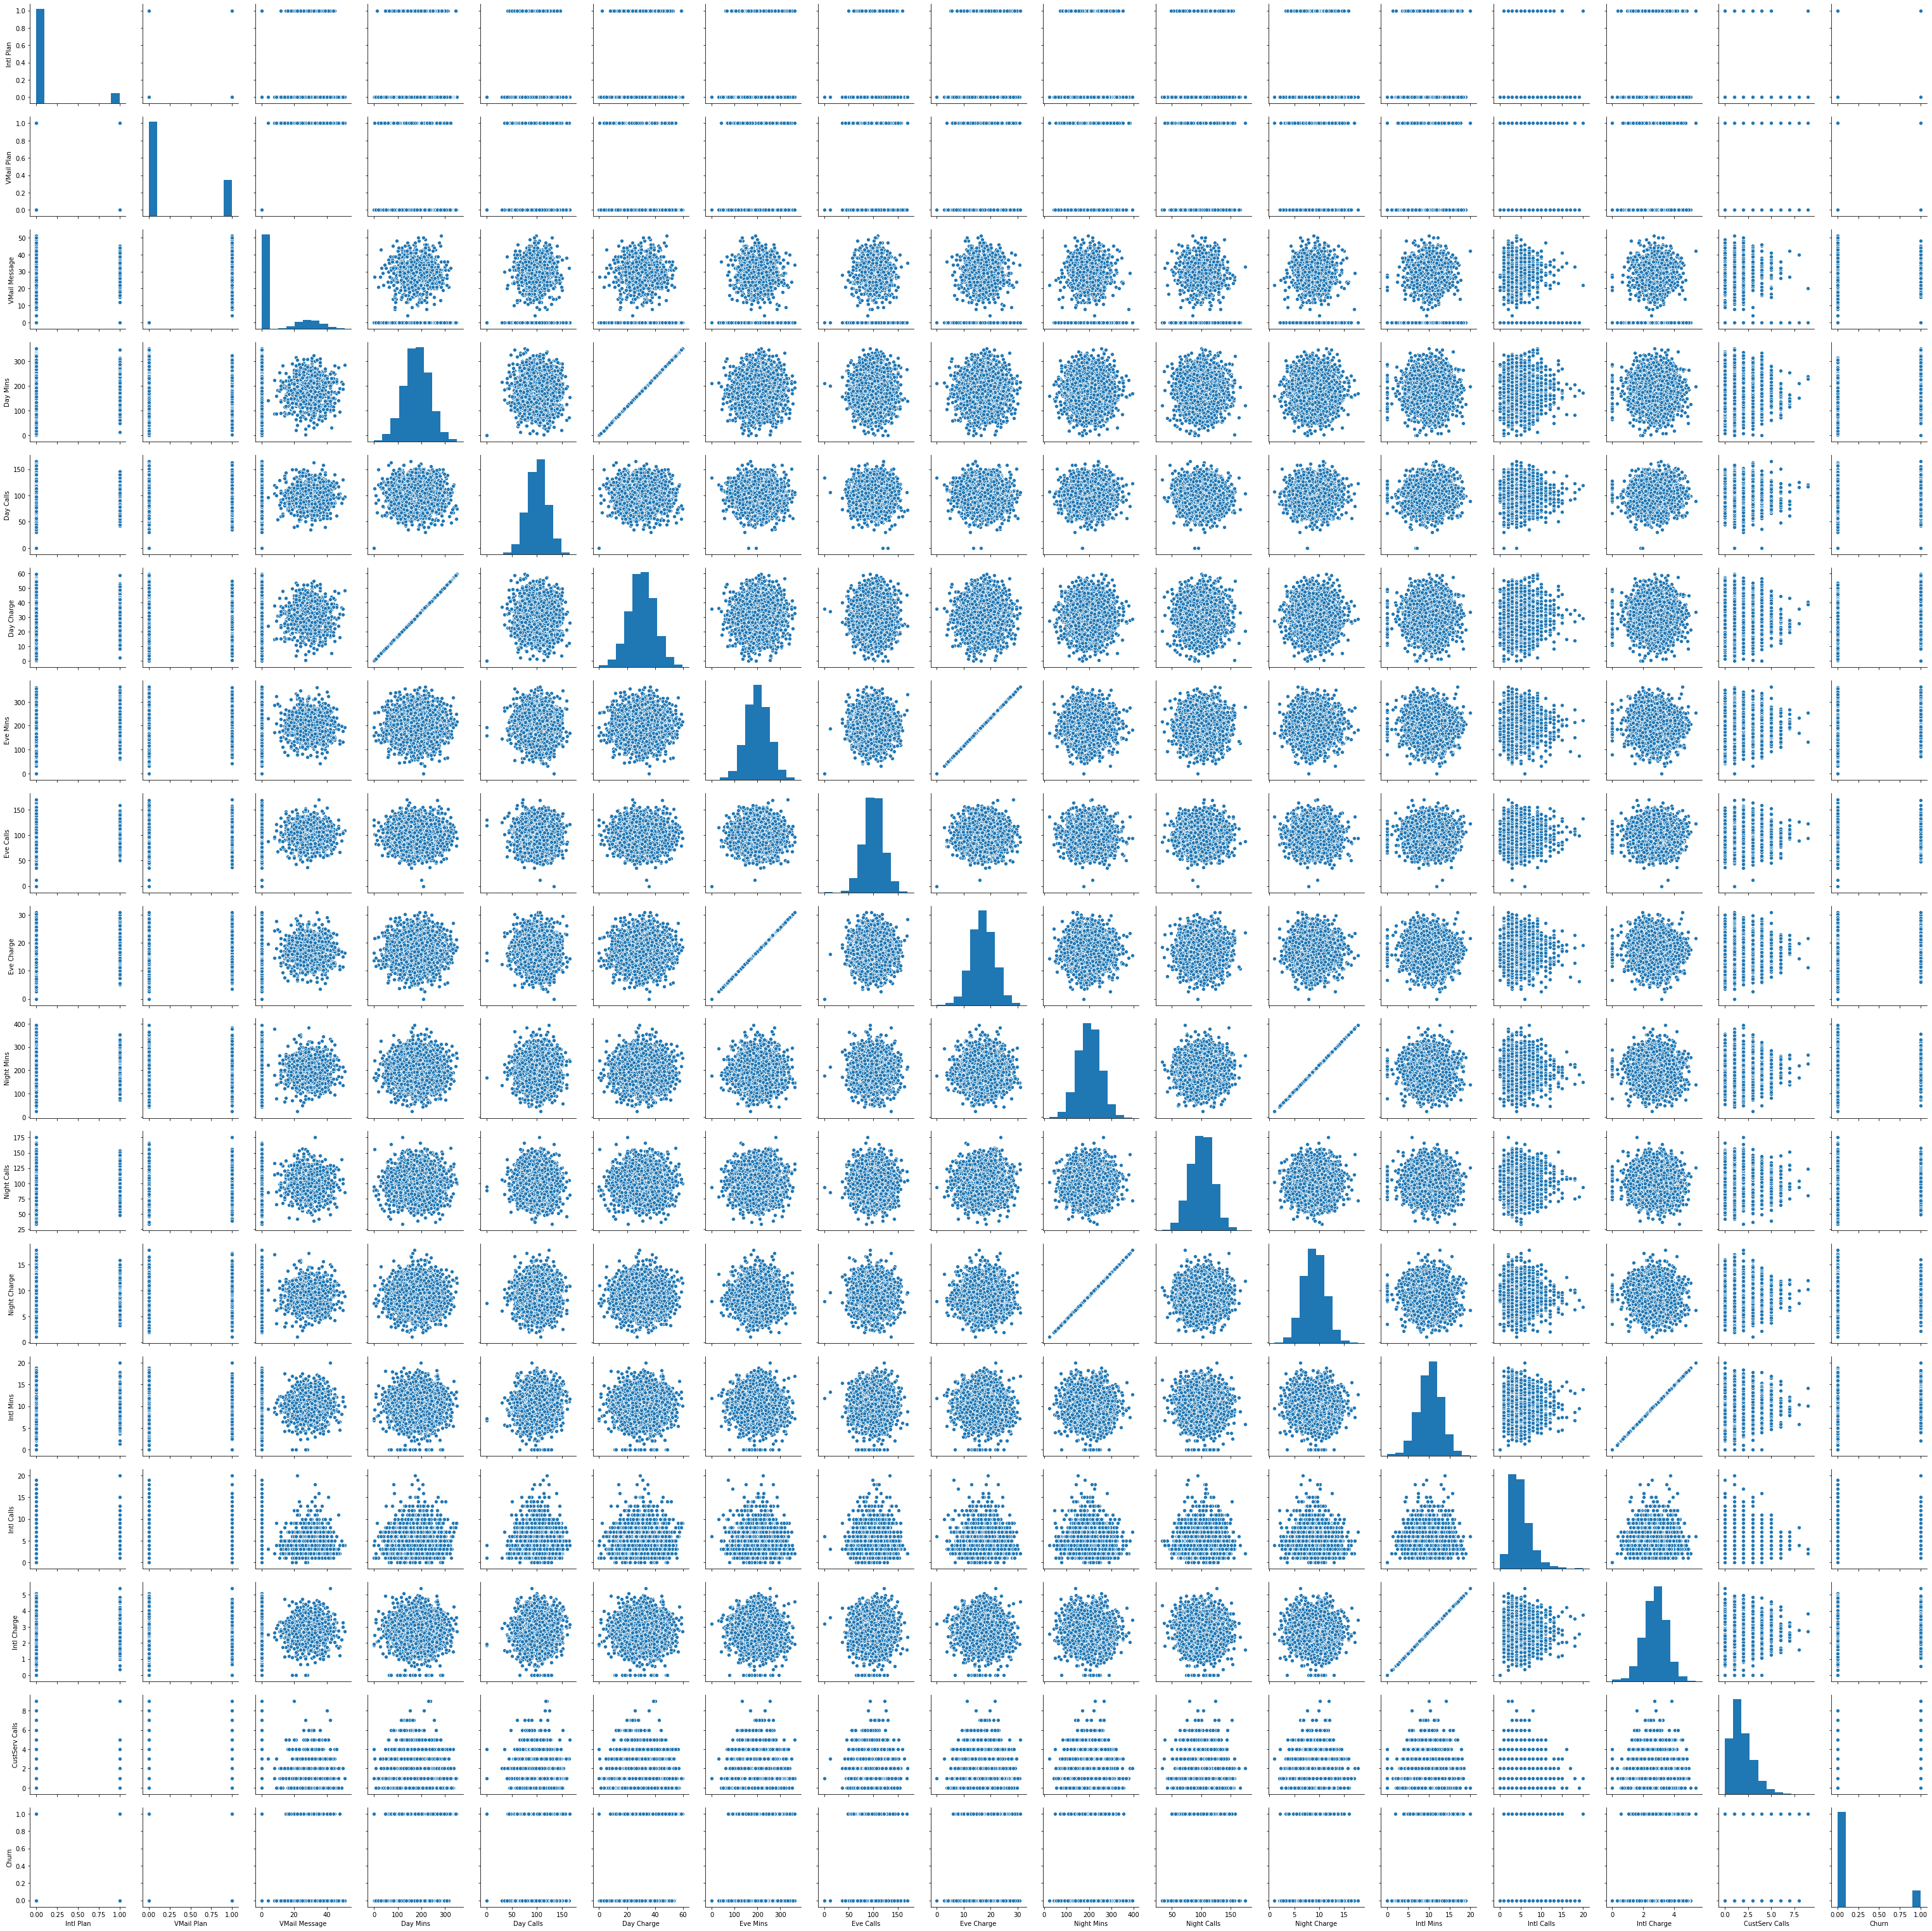

In [207]:
sns.pairplot(data)